# Personality Dataset



In [1]:
#Created by Jesús García García - Master´s Degree in Big Data Analytics UEM

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline

#read dataset
dataset_path = r"C:\mbti_1.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False, encoding='cp1252')
#create new columns
df.columns = ['label', 'text']

##START Preprocessing texts##

#delete strange characters from Dataset (some of them won´t be deleted because its are useful to guess personality)
df['text'] = df['text'].str.replace(r"[/%_*\"\'@$,]", '')

##END Preprocessing texts##

#print head of Dataset
df.head()

b'Skipping line 171: expected 2 fields, saw 23\nSkipping line 6103: expected 2 fields, saw 4\n'


,label,text
0,ENTP,Im finding the lack of me in these posts very ...
1,INTP,Good one https:www.youtube.comwatch?v=fHiG...
2,INTJ,Dear INTP I enjoyed our conversation the oth...
3,ENTJ,Youre fired.|||Thats another silly misconcepti...
4,INTJ,1837 .|||Science is not perfect. No scientist...


In [3]:
#word counts
def var_row(row):
    l = []
    #Each entry separated by "|||" (3 pipe characters)
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
#words per comment (we are going to analyse last 50 messages each line)
df['words_comment'] = df['text'].apply(lambda x: len(x.split())/50)
#variance of word counts
df['variance_word_counts'] = df['text'].apply(lambda x: var_row(x))
#print head of Dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 4 columns):
label                   8672 non-null object
text                    8672 non-null object
words_comment           8672 non-null float64
variance_word_counts    8672 non-null float64
dtypes: float64(2), object(2)
memory usage: 271.1+ KB


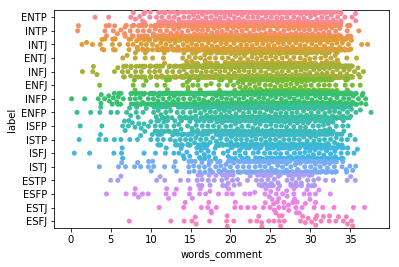

In [4]:
#print swarmplot
sns.swarmplot(x="words_comment", y="label", data=df)

In [5]:
df.groupby('label').agg({'label':'count'})

,label
label,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1469


In [6]:
#Create new df aux
dfaux=df.copy()

#Delete not useful labels because data are not relevant
dfaux.drop(dfaux[dfaux.label == 'ESFJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESFP'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTP'].index, inplace=True)
#http per comment
dfaux['http_comment'] = dfaux['text'].apply(lambda x: x.count('http')/50)
#points per comment
dfaux['points_comment'] = dfaux['text'].apply(lambda x: x.count('...')/50)
#question per comment
dfaux['question_comment'] = dfaux['text'].apply(lambda x: x.count('?')/50)
#exclamation per comment
dfaux['exclamation_comment'] = dfaux['text'].apply(lambda x: x.count('!')/50)
#caret per comment
dfaux['caret_comment'] = dfaux['text'].apply(lambda x: x.count('^')/50)
#wink emoji per comment
dfaux['emojiwink_comment'] = dfaux['text'].apply(lambda x: x.count(';)')/50)
#smile emoji per comment
dfaux['emojismile_comment'] = dfaux['text'].apply(lambda x: x.count(':)')/50)
#plus smile emoji per comment
dfaux['emojismilep_comment'] = dfaux['text'].apply(lambda x: x.count(':D')/50)
#plusp smile emoji per comment
dfaux['emojismilepp_comment'] = dfaux['text'].apply(lambda x: x.count(':-)')/50)

dfaux.head()

,label,text,words_comment,variance_word_counts,http_comment,points_comment,question_comment,exclamation_comment,caret_comment,emojiwink_comment,emojismile_comment,emojismilep_comment,emojismilepp_comment
0,ENTP,Im finding the lack of me in these posts very ...,23.40,187.4756,0.20,0.38,0.10,0.00,0.0,0.00,0.10,0.18,0.0
1,INTP,Good one https:www.youtube.comwatch?v=fHiG...,16.70,181.2576,0.10,0.26,0.24,0.08,0.0,0.00,0.14,0.04,0.0
2,INTJ,Dear INTP I enjoyed our conversation the oth...,21.28,181.8324,0.04,0.52,0.22,0.06,0.0,0.00,0.00,0.00,0.0
3,ENTJ,Youre fired.|||Thats another silly misconcepti...,19.34,196.4576,0.12,0.42,0.20,0.02,0.0,0.02,0.00,0.00,0.0
4,INTJ,1837 .|||Science is not perfect. No scientist...,29.82,97.7200,0.02,0.78,0.20,0.00,0.0,0.00,0.00,0.00,0.0


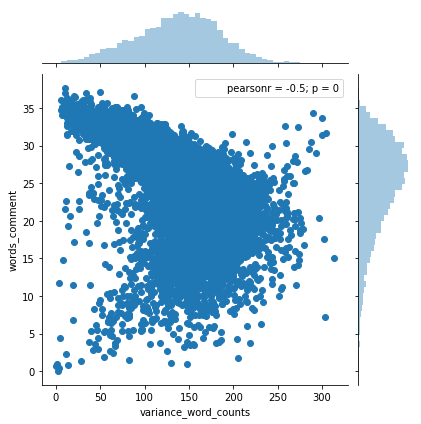

In [7]:
sns.jointplot(x='variance_word_counts',y='words_comment',data=dfaux)

In [8]:
# Group by label all relevant variables. Majority of them are related to mood
print(dfaux.groupby('label').agg({'http_comment': 'mean'}))
print(dfaux.groupby('label').agg({'points_comment': 'mean'}))
print(dfaux.groupby('label').agg({'question_comment': 'mean'}))
print(dfaux.groupby('label').agg({'exclamation_comment': 'mean'}))
print(dfaux.groupby('label').agg({'caret_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojiwink_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismile_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilep_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilepp_comment': 'mean'}))

       http_comment
label              
ENFJ       0.053263
ENFP       0.050459
ENTJ       0.053160
ENTP       0.048263
INFJ       0.065596
INFP       0.075426
INTJ       0.063596
INTP       0.070790
ISFJ       0.070602
ISFP       0.088339
ISTJ       0.061171
ISTP       0.081009
       points_comment
label                
ENFJ         0.744421
ENFP         0.715881
ENTJ         0.646667
ENTP         0.631036
INFJ         0.721729
INFP         0.676605
INTJ         0.631101
INTP         0.632586
ISFJ         0.661446
ISFP         0.596162
ISTJ         0.638341
ISTP         0.587003
       question_comment
label                  
ENFJ           0.220632
ENFP           0.236178
ENTJ           0.250303
ENTP           0.224204
INFJ           0.215602
INFP           0.209891
INTJ           0.224550
INTP           0.229762
ISFJ           0.202530
ISFP           0.218672
ISTJ           0.222829
ISTP           0.223917
       exclamation_comment
label                     
ENFJ              0.27

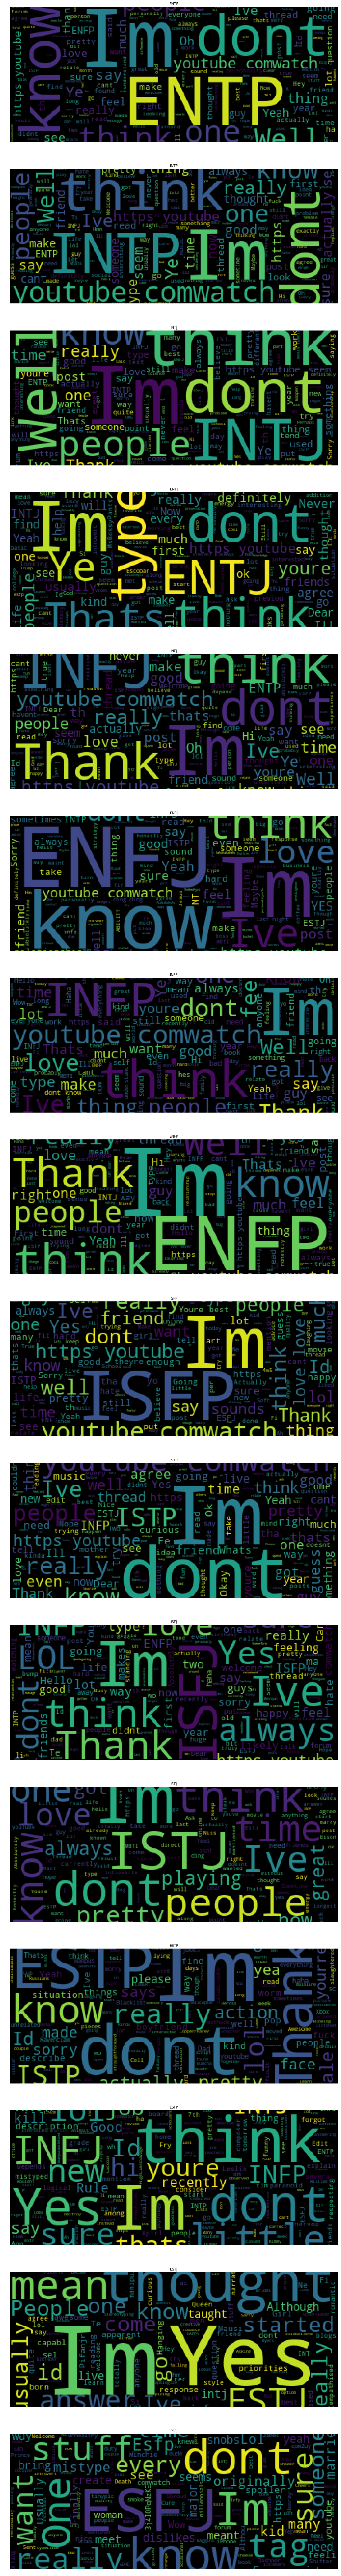

In [9]:
#Create wordcloud to guess which words are relevant for personality
import os
os.path
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
#Generate and paint graphics
fig, ax = plt.subplots(len(df['label'].unique()), sharex=True, figsize=(20,10*len(df['label'].unique())))

k = 0
for i in df['label'].unique():
    #Create new variable for printing all wordclouds
    dfaux2 = df[df['label'] == i]
    wordcloud = WordCloud().generate(dfaux2['text'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

In [10]:
#Vectorize
l_label = []
l_label = np.array(df.label)

l_text= []
l_text = np.array(df.text)

from sklearn.feature_extraction.text import CountVectorizer

cVectorizer = CountVectorizer()

X = cVectorizer.fit_transform(l_text)
y = l_label
print(X.shape)
print(y.shape)

(8672, 158343)
(8672,)


In [11]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,random_state=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

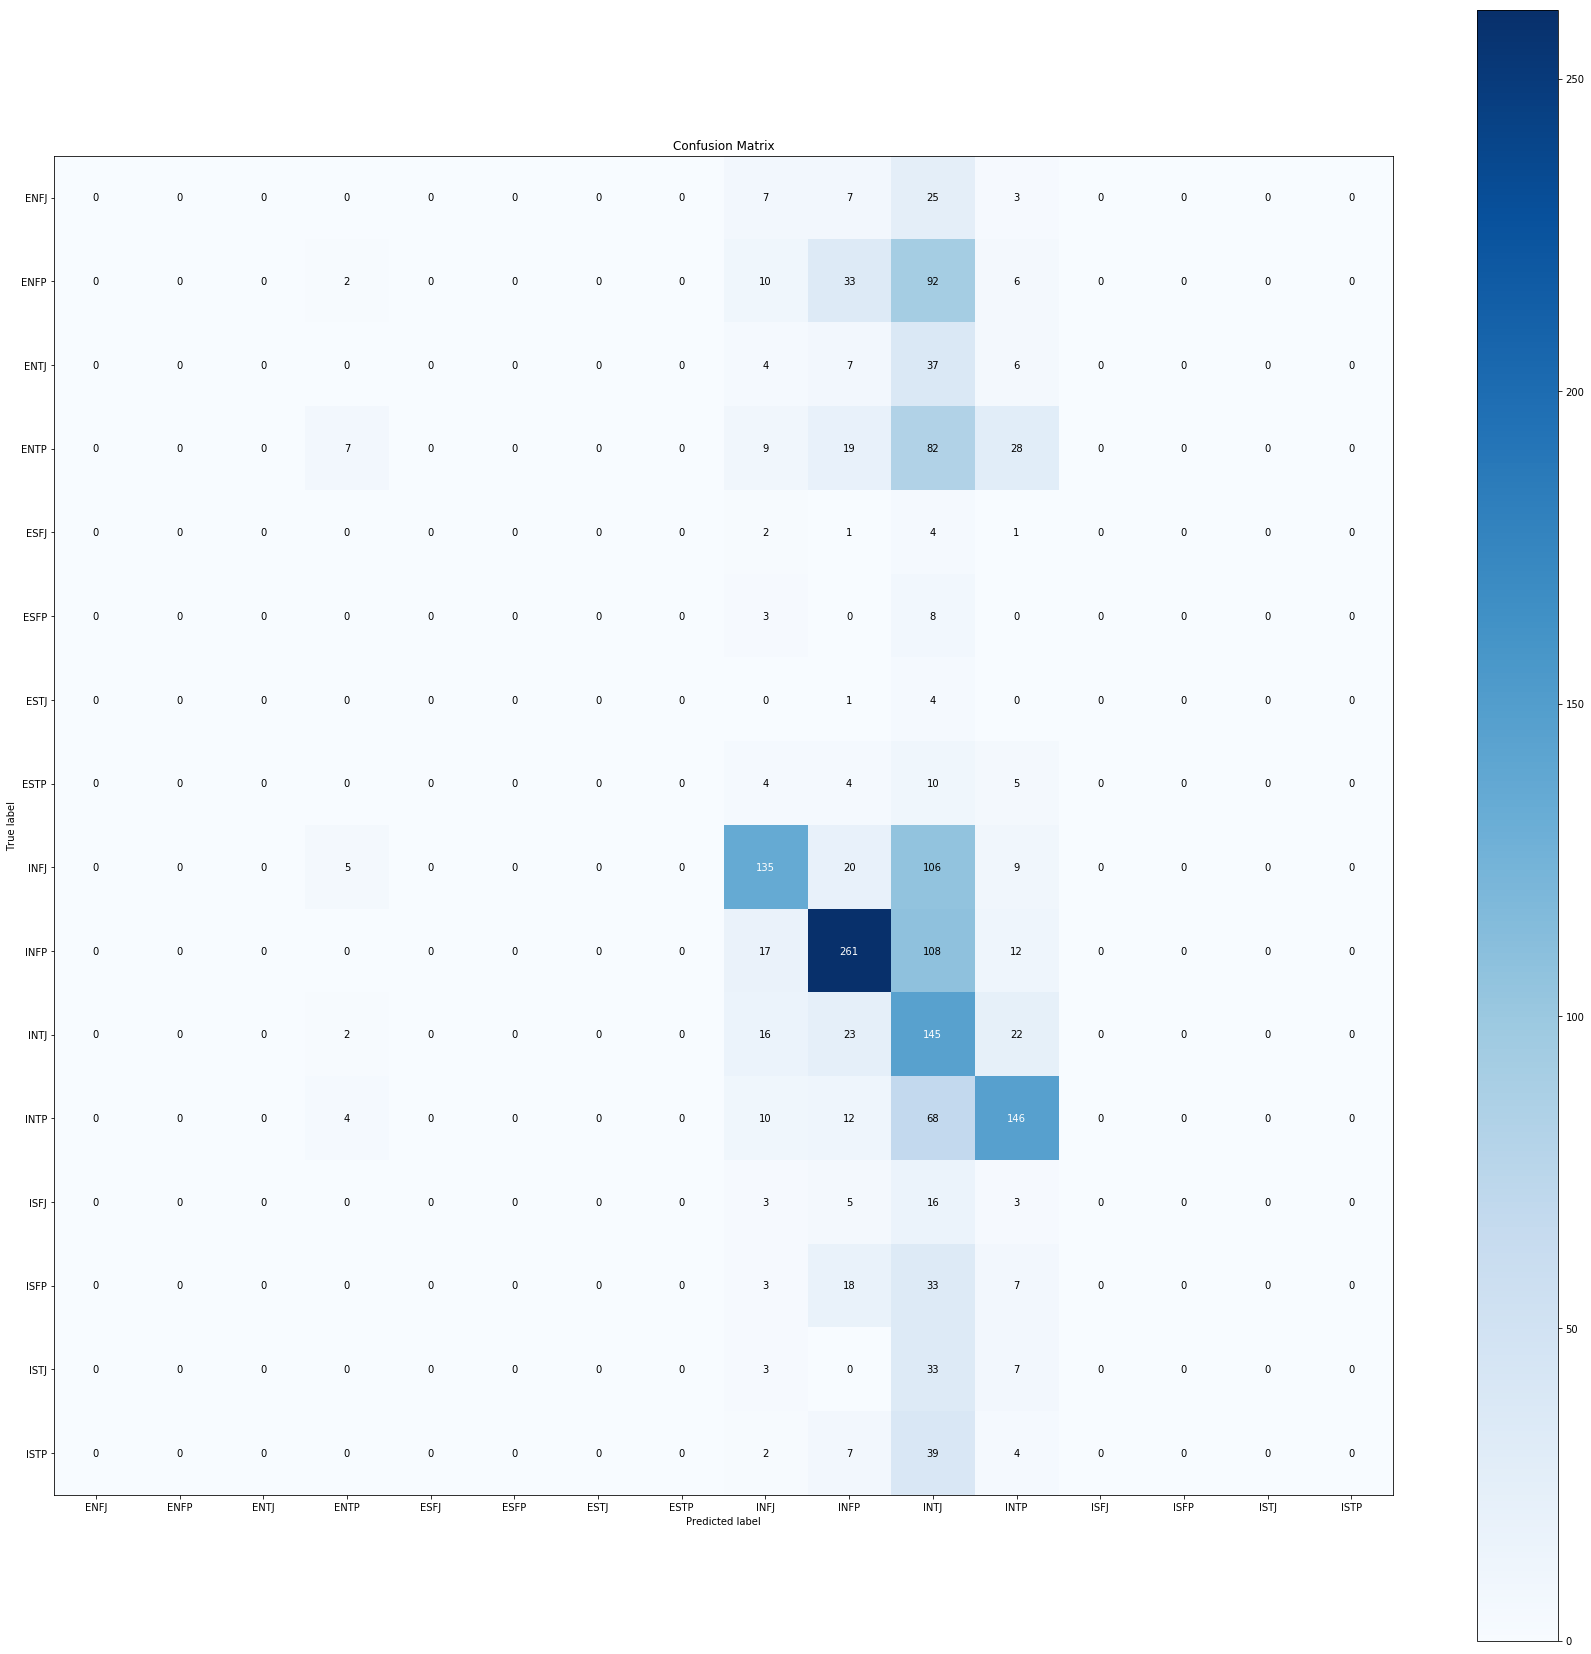

In [14]:
#Print confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import scikitplot as skplt
predictions = dtree.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [15]:
#Print Evaluation (classification report)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        42
       ENFP       0.00      0.00      0.00       143
       ENTJ       0.00      0.00      0.00        54
       ENTP       0.35      0.05      0.08       145
       ESFJ       0.00      0.00      0.00         8
       ESFP       0.00      0.00      0.00        11
       ESTJ       0.00      0.00      0.00         5
       ESTP       0.00      0.00      0.00        23
       INFJ       0.59      0.49      0.54       275
       INFP       0.62      0.66      0.64       398
       INTJ       0.18      0.70      0.28       208
       INTP       0.56      0.61      0.59       240
       ISFJ       0.00      0.00      0.00        27
       ISFP       0.00      0.00      0.00        61
       ISTJ       0.00      0.00      0.00        43
       ISTP       0.00      0.00      0.00        52

avg / total       0.37      0.40      0.35      1735



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


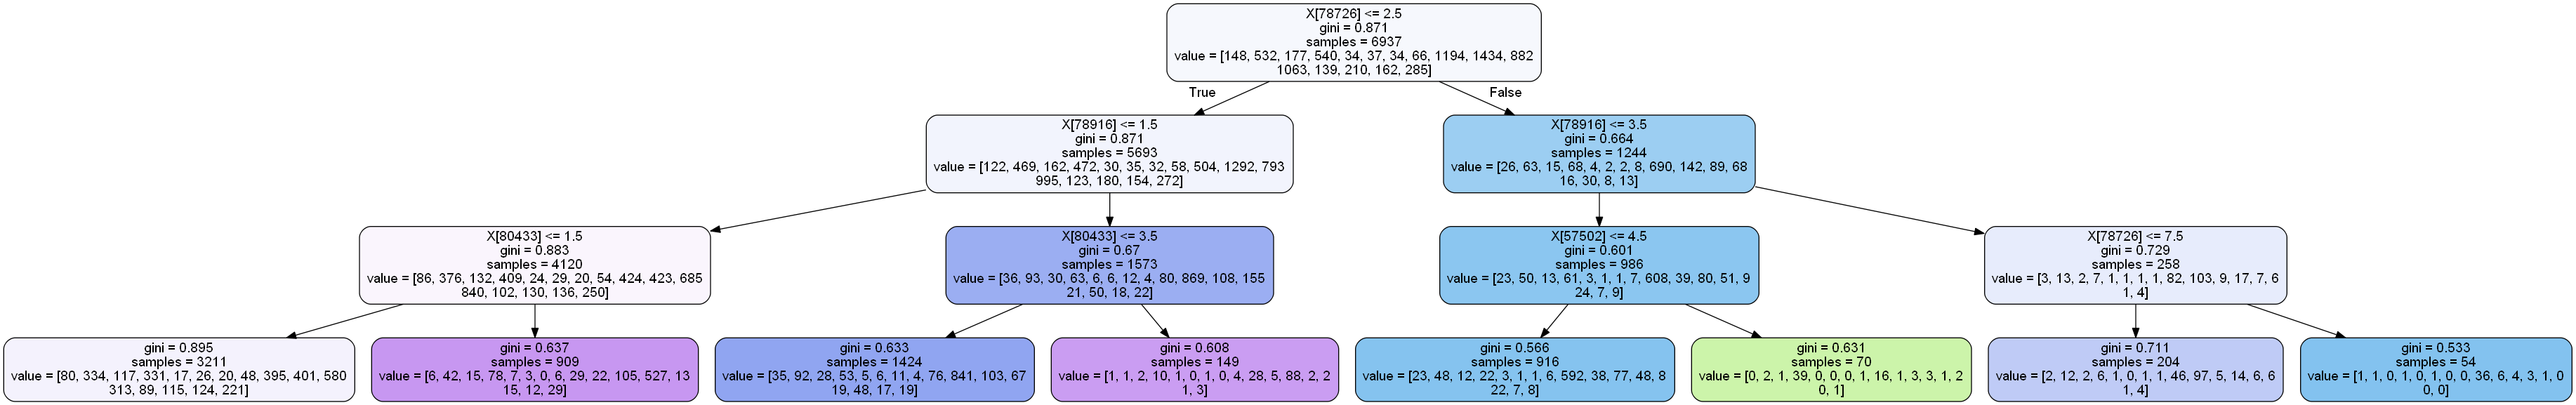

In [16]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

#Print big tree in low resolution
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [17]:
#Save Tree in pdf format
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("personality_decisionTree") 

'personality_decisionTree.pdf'

In [18]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

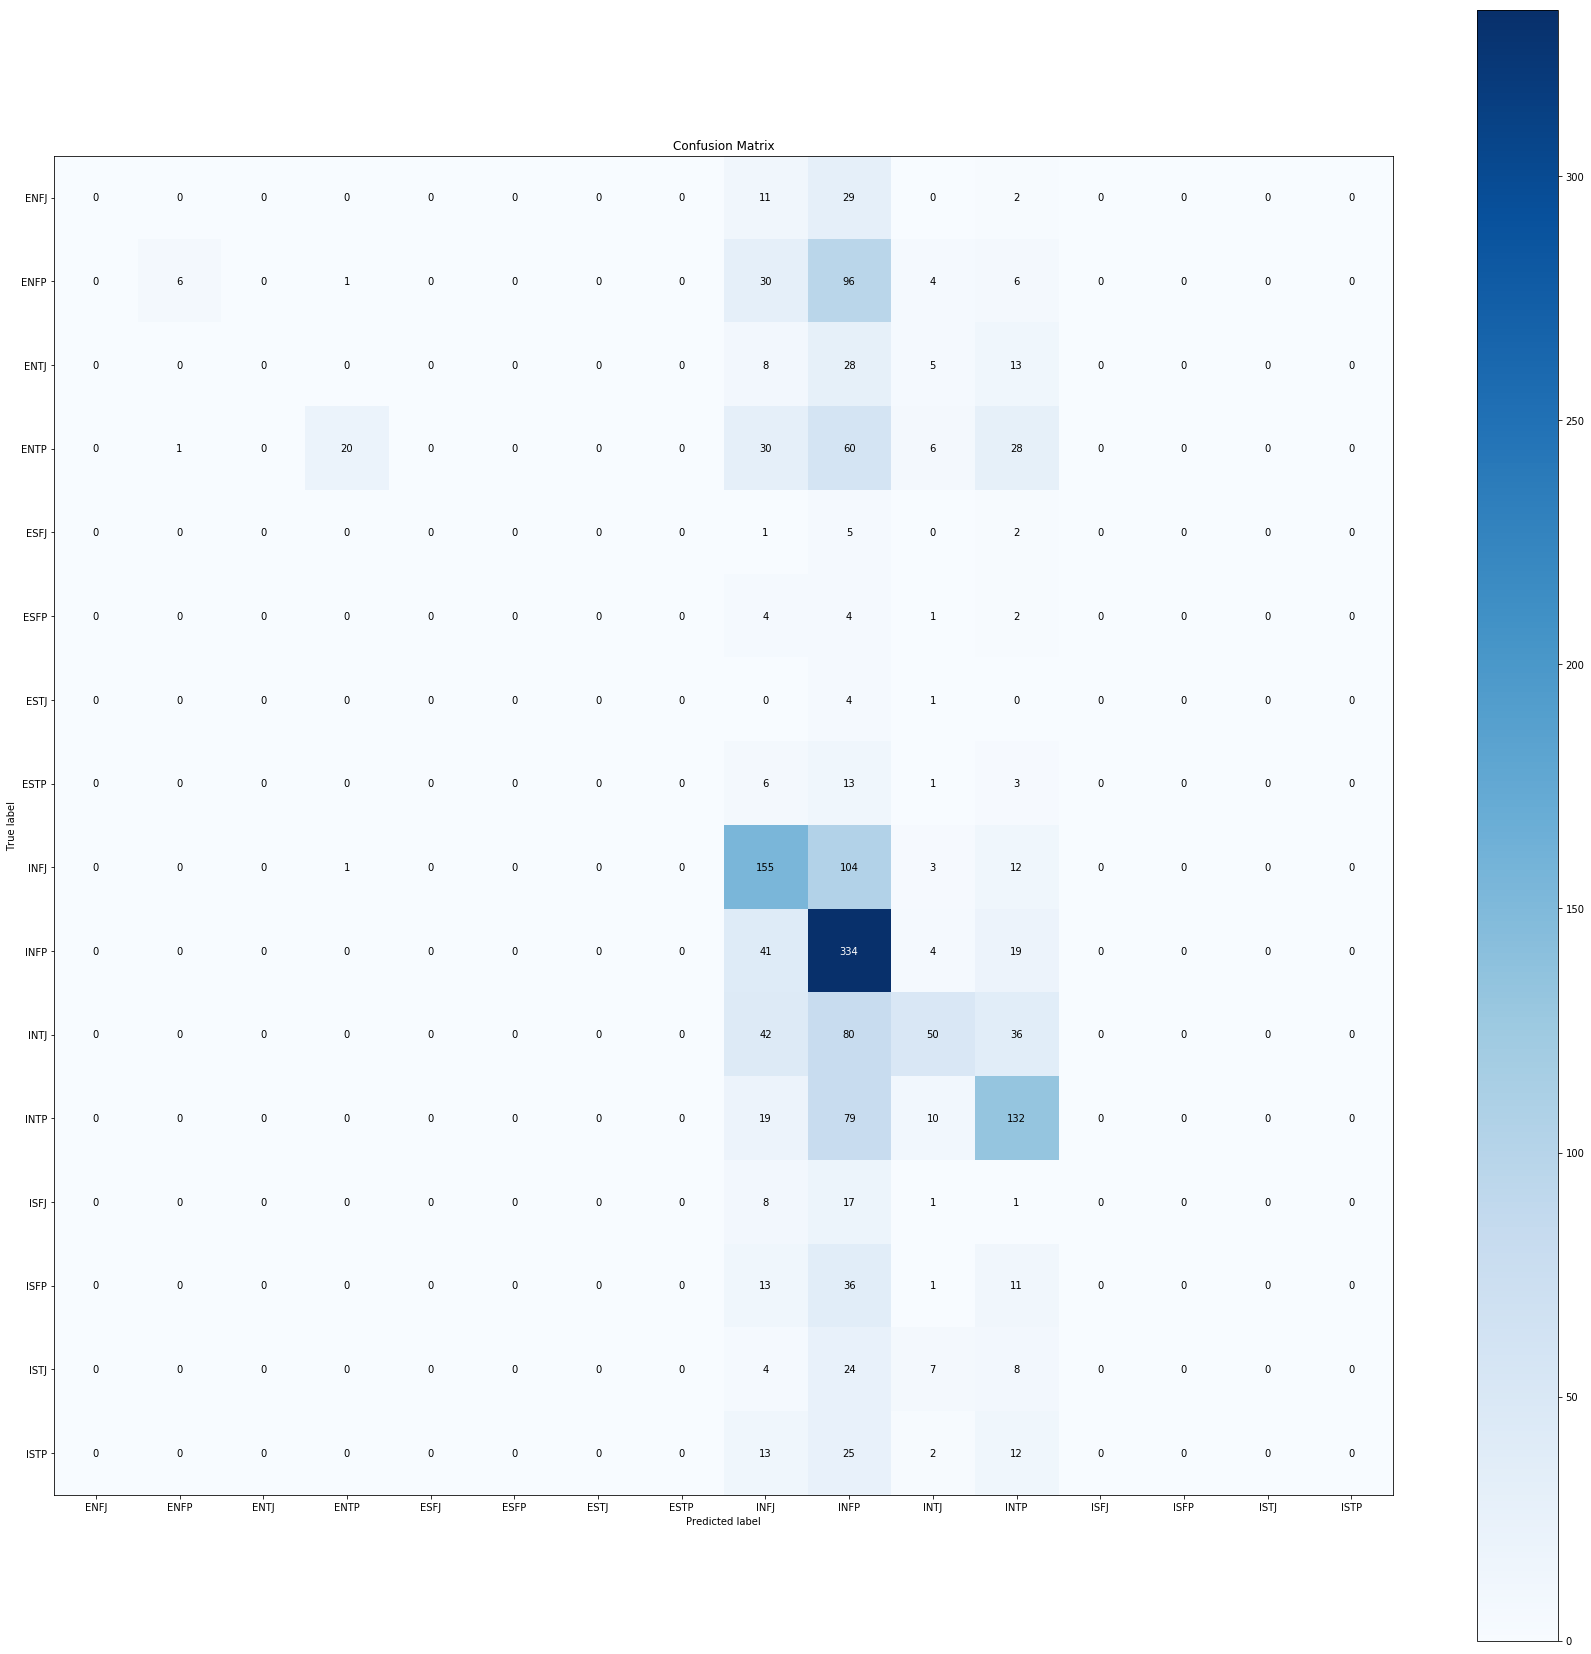

In [19]:
#Print confusion matrix
rfc_pred = rfc.predict(X_test)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, rfc_pred, normalize=False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [20]:
#Print Evaluation (classification report)
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        42
       ENFP       0.86      0.04      0.08       143
       ENTJ       0.00      0.00      0.00        54
       ENTP       0.91      0.14      0.24       145
       ESFJ       0.00      0.00      0.00         8
       ESFP       0.00      0.00      0.00        11
       ESTJ       0.00      0.00      0.00         5
       ESTP       0.00      0.00      0.00        23
       INFJ       0.40      0.56      0.47       275
       INFP       0.36      0.84      0.50       398
       INTJ       0.52      0.24      0.33       208
       INTP       0.46      0.55      0.50       240
       ISFJ       0.00      0.00      0.00        27
       ISFP       0.00      0.00      0.00        61
       ISTJ       0.00      0.00      0.00        43
       ISTP       0.00      0.00      0.00        52

avg / total       0.42      0.40      0.32      1735



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada.get_params()
print(ada.score(X_train, y_train))

0.393830185959


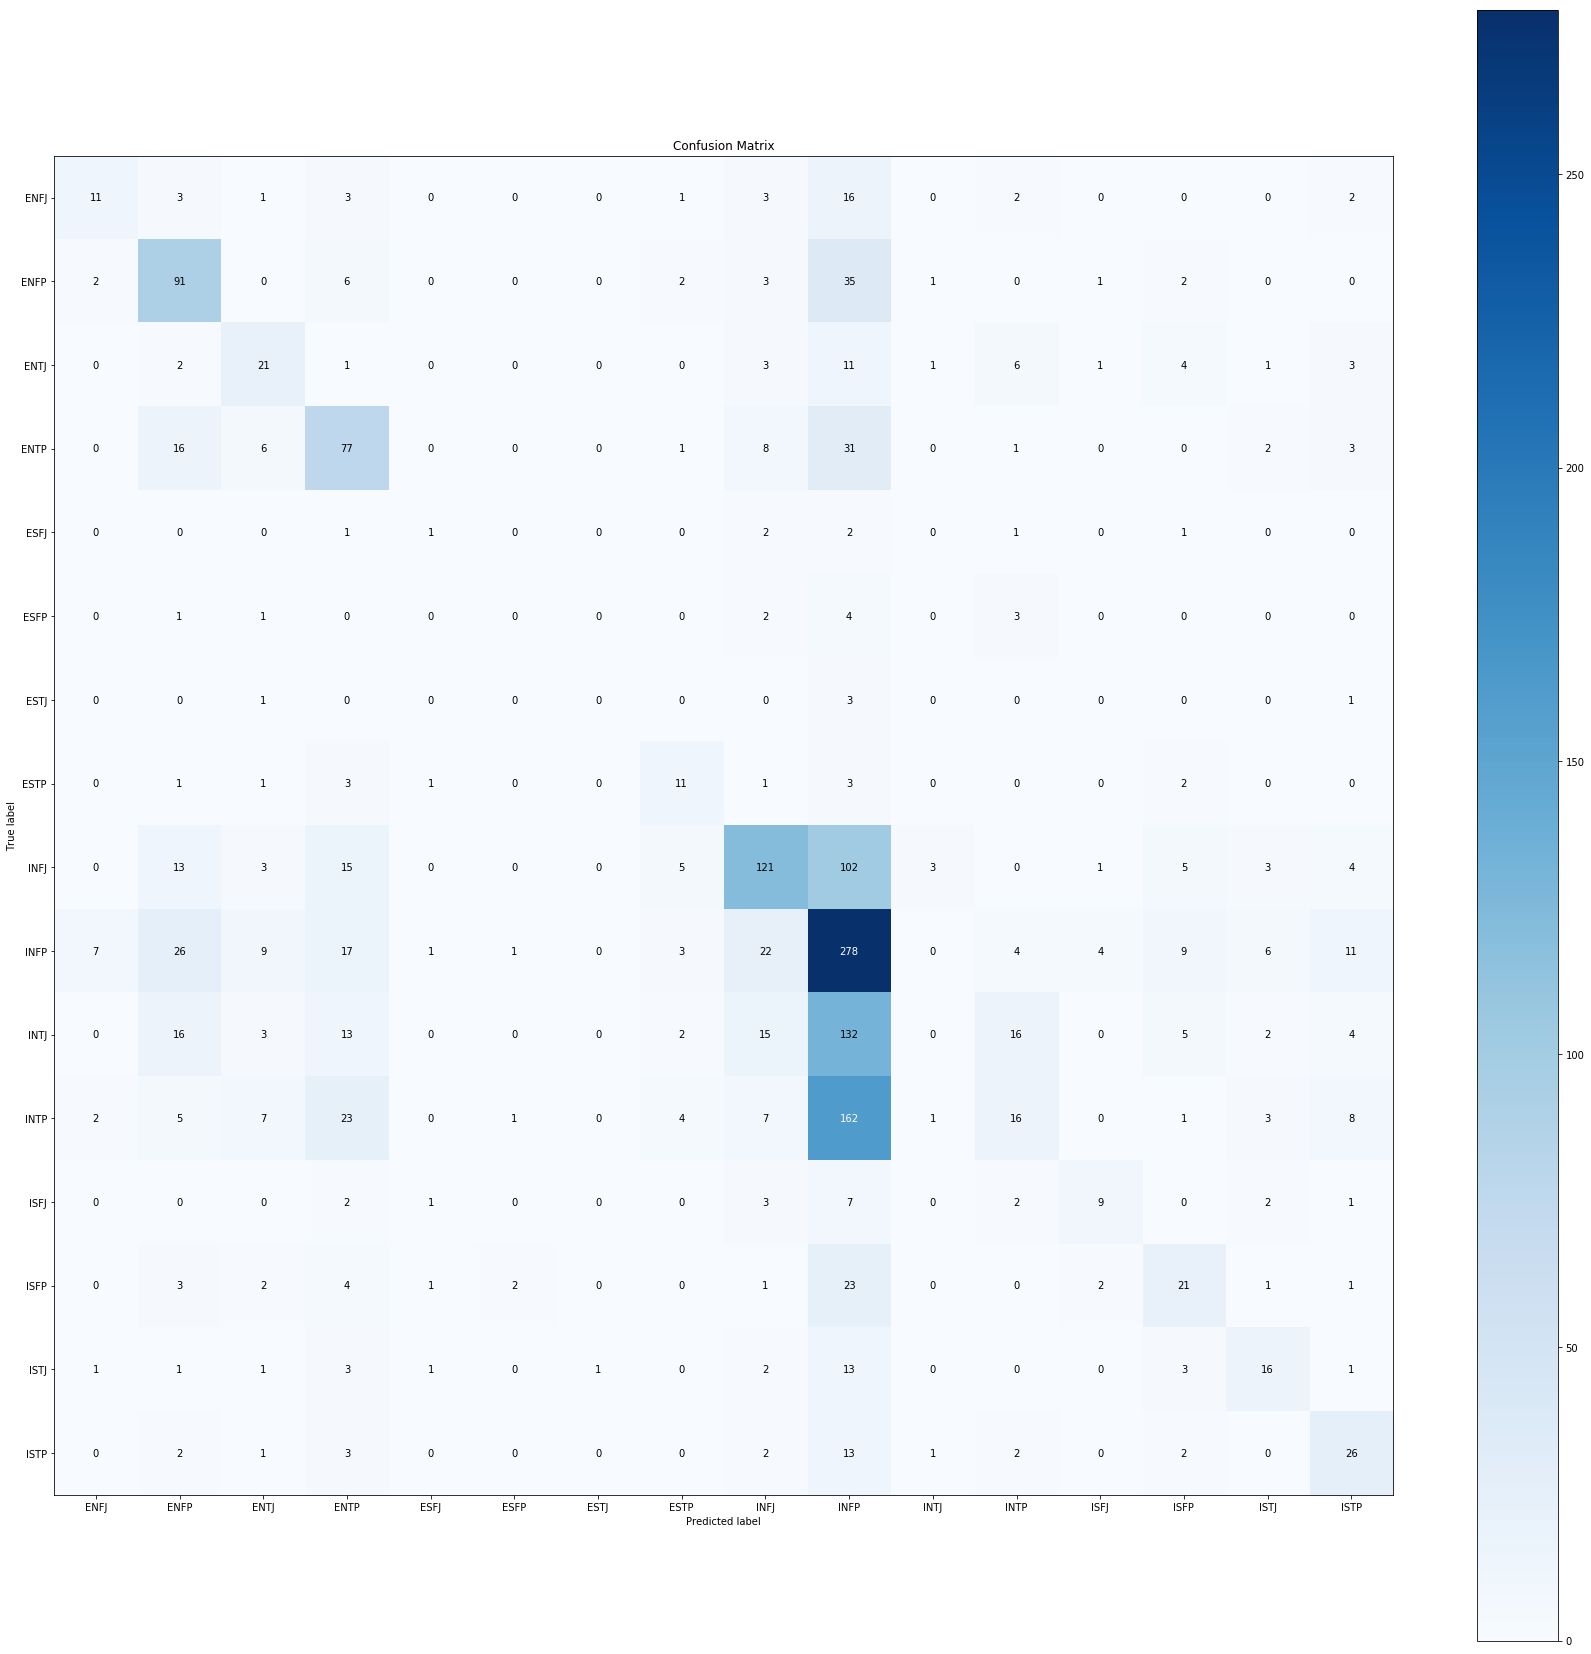

In [22]:
#Print confusion matrix
adb_pred = ada.predict(X_test)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, adb_pred, normalize=False)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [23]:
#Print Evaluation (classification report)
print(classification_report(y_test,adb_pred))

             precision    recall  f1-score   support

       ENFJ       0.48      0.26      0.34        42
       ENFP       0.51      0.64      0.56       143
       ENTJ       0.37      0.39      0.38        54
       ENTP       0.45      0.53      0.49       145
       ESFJ       0.17      0.12      0.14         8
       ESFP       0.00      0.00      0.00        11
       ESTJ       0.00      0.00      0.00         5
       ESTP       0.38      0.48      0.42        23
       INFJ       0.62      0.44      0.51       275
       INFP       0.33      0.70      0.45       398
       INTJ       0.00      0.00      0.00       208
       INTP       0.30      0.07      0.11       240
       ISFJ       0.50      0.33      0.40        27
       ISFP       0.38      0.34      0.36        61
       ISTJ       0.44      0.37      0.41        43
       ISTP       0.40      0.50      0.44        52

avg / total       0.37      0.40      0.36      1735

